# **IMPORTADO DE MÓDULOS**

In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

In [2]:
from functions import (Calculate_CFD, create_position, plot_gaussian, get_gaussian_params,
                       calculate_gaussian_center_sigma, calculate_slope_y_intercept)

In [3]:
# Load data 
non_normalized_dir = '/home/josea/DEEP_TIMING/DEEP_TIMING_VS/Na22_filtered_data/'
normalized_dir = '/home/josea/DEEP_TIMING/DEEP_TIMING_VS/Na22_filtered_data/'

non_normalized_data = np.load(os.path.join(non_normalized_dir,'pulsos_Na22_filt_norm_practica_polyfit_sin_normalizar.npz'))['data']
normalized_data = np.load(os.path.join(normalized_dir, 'Na22_test_val.npz'))['data']

# **IMPORTANT DEFINITIONS**

In [24]:
fraction = 0.2    # Fraction to attenuate pulse for CFD
shift = 7         # Delay for CFD 
threshold = 0.01  # Threshold for relative Leading Edge
t_shift = 1     
time_step = 0.2   # In ns
nbins = 71

In [25]:
DATA_00 = normalized_data
DATA_02 = create_position(DATA_00, channel_to_move = 1, channel_to_fix = 0, t_shift = t_shift)
DATA_20 = create_position(DATA_00, channel_to_move = 0, channel_to_fix = 1, t_shift = t_shift)
DATA_04 = create_position(DATA_00, channel_to_move = 1, channel_to_fix = 0, t_shift = int(2*t_shift))
DATA_40 = create_position(DATA_00, channel_to_move = 0, channel_to_fix = 1, t_shift = int(2*t_shift))

# **CFD**

In [26]:
timestamps_CFD_dec0_DATA_00 = Calculate_CFD(DATA_00[:, :, 0], fraction = fraction, shift = shift, time_step = time_step)
timestamps_CFD_dec1_DATA_00 = Calculate_CFD(DATA_00[:, :, 1], fraction = fraction, shift = shift, time_step = time_step)

timestamps_CFD_dec0_DATA_02 = Calculate_CFD(DATA_02[:, :, 0], fraction = fraction, shift = shift, time_step = time_step)
timestamps_CFD_dec1_DATA_02 = Calculate_CFD(DATA_02[:, :, 1], fraction = fraction, shift = shift, time_step = time_step)

timestamps_CFD_dec0_DATA_20 = Calculate_CFD(DATA_20[:, :, 0], fraction = fraction, shift = shift, time_step = time_step)
timestamps_CFD_dec1_DATA_20 = Calculate_CFD(DATA_20[:, :, 1], fraction = fraction, shift = shift, time_step = time_step)

timestamps_CFD_dec0_DATA_04 = Calculate_CFD(DATA_04[:, :, 0], fraction = fraction, shift = shift, time_step = time_step)
timestamps_CFD_dec1_DATA_04 = Calculate_CFD(DATA_04[:, :, 1], fraction = fraction, shift = shift, time_step = time_step)

timestamps_CFD_dec0_DATA_40 = Calculate_CFD(DATA_40[:, :, 0], fraction = fraction, shift = shift, time_step = time_step)
timestamps_CFD_dec1_DATA_40 = Calculate_CFD(DATA_40[:, :, 1], fraction = fraction, shift = shift, time_step = time_step)

V40: CENTROID(ns) = 0.3998 +/- 0.00083  FWHM(ns) = 0.2149 +/- 0.00089
V20: CENTROID(ns) = 0.1995 +/- 0.00076  FWHM(ns) = 0.2153 +/- 0.00082
V00: CENTROID(ns) = -0.0004 +/- 0.00063  FWHM(ns) = 0.2140 +/- 0.00068
V02: CENTROID(ns) = -0.2004 +/- 0.00072  FWHM(ns) = 0.2141 +/- 0.00077
V04: CENTROID(ns) = -0.4004 +/- 0.00088  FWHM(ns) = 0.2141 +/- 0.00094



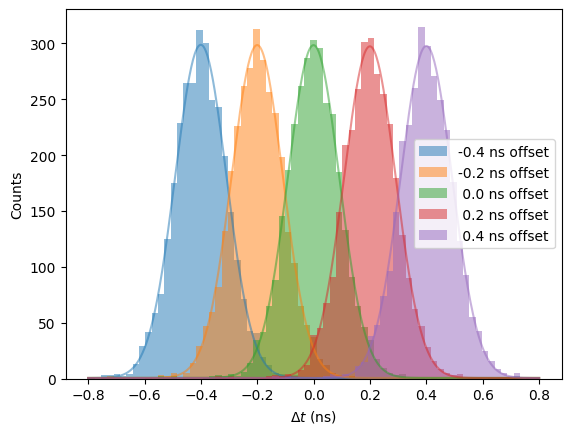

In [27]:
TOF_CFD_V00 = timestamps_CFD_dec0_DATA_00 - timestamps_CFD_dec1_DATA_00
TOF_CFD_V02 = timestamps_CFD_dec0_DATA_02 - timestamps_CFD_dec1_DATA_02
TOF_CFD_V20 = timestamps_CFD_dec0_DATA_20 - timestamps_CFD_dec1_DATA_20
TOF_CFD_V04 = timestamps_CFD_dec0_DATA_04 - timestamps_CFD_dec1_DATA_04
TOF_CFD_V40 = timestamps_CFD_dec0_DATA_40 - timestamps_CFD_dec1_DATA_40

#------------------------------------------- Histogram and gaussian fit -----------------------------------------------
centroid_V00, sigmaN_V00 = calculate_gaussian_center_sigma(TOF_CFD_V00[None,:], np.zeros((TOF_CFD_V00.shape[0])), nbins = nbins) 

plot_gaussian(TOF_CFD_V04, centroid_V00, range = 0.8, label = '-0.4 ns offset', nbins = nbins)
plot_gaussian(TOF_CFD_V02, centroid_V00, range = 0.8, label = '-0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_CFD_V00, centroid_V00, range = 0.8, label = ' 0.0 ns offset', nbins = nbins)
plot_gaussian(TOF_CFD_V20, centroid_V00, range = 0.8, label = ' 0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_CFD_V40, centroid_V00, range = 0.8, label = ' 0.4 ns offset', nbins = nbins)

params_V04, errors_V04 = get_gaussian_params(TOF_CFD_V04, centroid_V00, range = 0.8, nbins = nbins)
params_V02, errors_V02 = get_gaussian_params(TOF_CFD_V02, centroid_V00, range = 0.8, nbins = nbins)
params_V00, errors_V00 = get_gaussian_params(TOF_CFD_V00, centroid_V00, range = 0.8, nbins = nbins)
params_V20, errors_V20 = get_gaussian_params(TOF_CFD_V20, centroid_V00, range = 0.8, nbins = nbins)
params_V40, errors_V40 = get_gaussian_params(TOF_CFD_V40, centroid_V00, range = 0.8, nbins = nbins)


print("V40: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V40[2], errors_V40[2], params_V40[3], errors_V40[3]))
print("V20: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V20[2], errors_V20[2], params_V20[3], errors_V20[3]))
print("V00: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V00[2], errors_V00[2], params_V00[3], errors_V00[3]))
print("V02: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V02[2], errors_V02[2], params_V02[3], errors_V02[3]))
print("V04: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V04[2], errors_V04[2], params_V04[3], errors_V04[3]))

print('')
plt.legend()
plt.xlabel('$\Delta t$ (ns)')
plt.ylabel('Counts')
plt.show()

In [28]:
# BOOTSTRAPING
resolution_list = []

for i in range(6):
    
    a = np.random.choice(np.arange(0, normalized_data.shape[0]), size = 500, replace = False)

    params_V04, errors_V04 = get_gaussian_params(TOF_CFD_V04[a], centroid_V00, range = 0.8, nbins = nbins)
    params_V02, errors_V02 = get_gaussian_params(TOF_CFD_V02[a], centroid_V00, range = 0.8, nbins = nbins)
    params_V00, errors_V00 = get_gaussian_params(TOF_CFD_V00[a], centroid_V00, range = 0.8, nbins = nbins)
    params_V20, errors_V20 = get_gaussian_params(TOF_CFD_V20[a], centroid_V00, range = 0.8, nbins = nbins)
    params_V40, errors_V40 = get_gaussian_params(TOF_CFD_V40[a], centroid_V00, range = 0.8, nbins = nbins)

    resolution = np.mean((params_V40[3], params_V20[3], params_V00[3], params_V02[3], params_V04[3]))
    resolution_list.append(resolution)

print(np.mean(np.array(resolution_list))*1000)
print(np.std(np.array(resolution_list))*1000)

213.26283335683013
9.09490601897662


/home/josea/.local/lib/python3.11/site-packages/scipy/optimize/_minpack_py.py:1010: OptimizeWarning: Covariance of the parameters could not be estimated
  warnings.warn('Covariance of the parameters could not be estimated',


In [29]:
error_V02 = abs((TOF_CFD_V02 - centroid_V00[:, np.newaxis] + time_step*t_shift))
error_V00 = abs((TOF_CFD_V00 - centroid_V00[:, np.newaxis]))
error_V20 = abs((TOF_CFD_V20 - centroid_V00[:, np.newaxis] - time_step*t_shift))
error_V04 = abs((TOF_CFD_V04 - centroid_V00[:, np.newaxis] + 2*time_step*t_shift))
error_V40 = abs((TOF_CFD_V40 - centroid_V00[:, np.newaxis] - 2*time_step*t_shift))

Error = np.concatenate((error_V02, error_V00, error_V20, error_V04, error_V40), axis = 1)   
MAE = np.mean(Error)   
print(MAE)          

0.08442563460350742


# **RELATIVE LEADING EDGE** 

In [30]:
timestamps_RLE_dec0_DATA_00_list = []
timestamps_RLE_dec0_DATA_02_list = []
timestamps_RLE_dec0_DATA_20_list = []
timestamps_RLE_dec0_DATA_04_list = []
timestamps_RLE_dec0_DATA_40_list = []

timestamps_RLE_dec1_DATA_00_list = []
timestamps_RLE_dec1_DATA_02_list = []
timestamps_RLE_dec1_DATA_20_list = []
timestamps_RLE_dec1_DATA_04_list = []
timestamps_RLE_dec1_DATA_40_list = []


for i in range(DATA_00.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_00[i,:,0], time_step, threshold = 3*threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_00[i,:,1], time_step, threshold = 3*threshold)
  timestamps_RLE_dec0_DATA_00_list.append(timestamp_dec0)
  timestamps_RLE_dec1_DATA_00_list.append(timestamp_dec1)

for i in range(DATA_02.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_02[i,:,0], time_step, threshold = 3*threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_02[i,:,1], time_step, threshold = 3*threshold)
  timestamps_RLE_dec0_DATA_02_list.append(timestamp_dec0)
  timestamps_RLE_dec1_DATA_02_list.append(timestamp_dec1)

for i in range(DATA_20.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_20[i,:,0], time_step, threshold = 3*threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_20[i,:,1], time_step, threshold = 3*threshold)
  timestamps_RLE_dec0_DATA_20_list.append(timestamp_dec0)
  timestamps_RLE_dec1_DATA_20_list.append(timestamp_dec1)

for i in range(DATA_04.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_04[i,:,0], time_step, threshold = 3*threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_04[i,:,1], time_step, threshold = 3*threshold)
  timestamps_RLE_dec0_DATA_04_list.append(timestamp_dec0)
  timestamps_RLE_dec1_DATA_04_list.append(timestamp_dec1)

for i in range(DATA_40.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_40[i,:,0], time_step, threshold = 3*threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_40[i,:,1], time_step, threshold = 3*threshold)
  timestamps_RLE_dec0_DATA_40_list.append(timestamp_dec0)
  timestamps_RLE_dec1_DATA_40_list.append(timestamp_dec1)

timestamps_RLE_dec0_DATA_00 = np.array(timestamps_RLE_dec0_DATA_00_list)
timestamps_RLE_dec0_DATA_02 = np.array(timestamps_RLE_dec0_DATA_02_list)
timestamps_RLE_dec0_DATA_20 = np.array(timestamps_RLE_dec0_DATA_20_list)
timestamps_RLE_dec0_DATA_04 = np.array(timestamps_RLE_dec0_DATA_04_list)
timestamps_RLE_dec0_DATA_40 = np.array(timestamps_RLE_dec0_DATA_40_list)

timestamps_RLE_dec1_DATA_00 = np.array(timestamps_RLE_dec1_DATA_00_list)
timestamps_RLE_dec1_DATA_02 = np.array(timestamps_RLE_dec1_DATA_02_list)
timestamps_RLE_dec1_DATA_20 = np.array(timestamps_RLE_dec1_DATA_20_list)
timestamps_RLE_dec1_DATA_04 = np.array(timestamps_RLE_dec1_DATA_04_list)
timestamps_RLE_dec1_DATA_40 = np.array(timestamps_RLE_dec1_DATA_40_list)

V40: CENTROID(ns) = 0.4007 +/- 0.00101  FWHM(ns) = 0.2181 +/- 0.00108
V20: CENTROID(ns) = 0.2007 +/- 0.00113  FWHM(ns) = 0.2199 +/- 0.00122
V00: CENTROID(ns) = 0.0004 +/- 0.00097  FWHM(ns) = 0.2187 +/- 0.00104
V02: CENTROID(ns) = -0.1997 +/- 0.00093  FWHM(ns) = 0.2197 +/- 0.00099
V04: CENTROID(ns) = -0.3994 +/- 0.00085  FWHM(ns) = 0.2194 +/- 0.00091



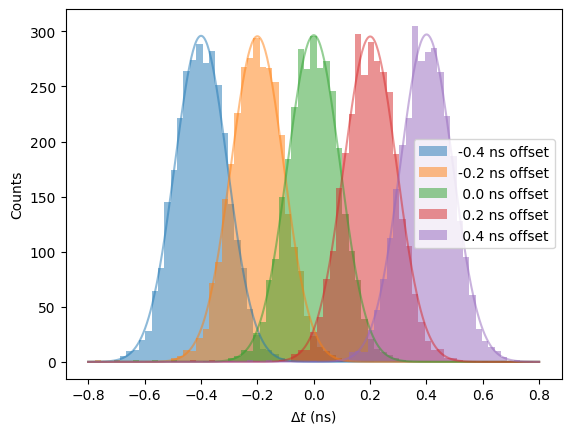

In [31]:
TOF_V00 = timestamps_RLE_dec0_DATA_00 - timestamps_RLE_dec1_DATA_00
TOF_V02 = timestamps_RLE_dec0_DATA_02 - timestamps_RLE_dec1_DATA_02
TOF_V20 = timestamps_RLE_dec0_DATA_20 - timestamps_RLE_dec1_DATA_20
TOF_V04 = timestamps_RLE_dec0_DATA_04 - timestamps_RLE_dec1_DATA_04
TOF_V40 = timestamps_RLE_dec0_DATA_40 - timestamps_RLE_dec1_DATA_40

#------------------------------------------- Histogram and gaussian fit -----------------------------------------------
centroid_V00, sigmaN_V00 = calculate_gaussian_center_sigma(TOF_V00[None,:], np.zeros((TOF_V00.shape[0])), nbins = nbins) 

plot_gaussian(TOF_V04, centroid_V00, range = 0.8, label = '-0.4 ns offset', nbins = nbins)
plot_gaussian(TOF_V02, centroid_V00, range = 0.8, label = '-0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_V00, centroid_V00, range = 0.8, label = ' 0.0 ns offset', nbins = nbins)
plot_gaussian(TOF_V20, centroid_V00, range = 0.8, label = ' 0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_V40, centroid_V00, range = 0.8, label = ' 0.4 ns offset', nbins = nbins)


params_V04, errors_V04 = get_gaussian_params(TOF_V04, centroid_V00, range = 0.8, nbins = nbins)
params_V02, errors_V02 = get_gaussian_params(TOF_V02, centroid_V00, range = 0.8, nbins = nbins)
params_V00, errors_V00 = get_gaussian_params(TOF_V00, centroid_V00, range = 0.8, nbins = nbins)
params_V20, errors_V20 = get_gaussian_params(TOF_V20, centroid_V00, range = 0.8, nbins = nbins)
params_V40, errors_V40 = get_gaussian_params(TOF_V40, centroid_V00, range = 0.8, nbins = nbins)


print("V40: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V40[2], errors_V40[2], params_V40[3], errors_V40[3]))
print("V20: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V20[2], errors_V20[2], params_V20[3], errors_V20[3]))
print("V00: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V00[2], errors_V00[2], params_V00[3], errors_V00[3]))
print("V02: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V02[2], errors_V02[2], params_V02[3], errors_V02[3]))
print("V04: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V04[2], errors_V04[2], params_V04[3], errors_V04[3]))

print('')
plt.legend()
plt.xlabel('$\Delta t$ (ns)')
plt.ylabel('Counts')
plt.show()

In [32]:
error_V02 = abs((TOF_V02 - centroid_V00[:, np.newaxis] + time_step*t_shift))
error_V00 = abs((TOF_V00 - centroid_V00[:, np.newaxis]))
error_V20 = abs((TOF_V20 - centroid_V00[:, np.newaxis] - time_step*t_shift))
error_V04 = abs((TOF_V04 - centroid_V00[:, np.newaxis] + 2*time_step*t_shift))
error_V40 = abs((TOF_V40 - centroid_V00[:, np.newaxis] - 2*time_step*t_shift))

Error = np.concatenate((error_V02, error_V00, error_V20, error_V04, error_V40), axis = 1)   
MAE = np.mean(Error)   
print(MAE)  

0.08373644249425541


# **D-LED**

In [33]:
DATA_00 = non_normalized_data 
DATA_02 = create_position(DATA_00, channel_to_move = 1, channel_to_fix = 0, t_shift = t_shift)
DATA_20 = create_position(DATA_00, channel_to_move = 0, channel_to_fix = 1, t_shift = t_shift)
DATA_04 = create_position(DATA_00, channel_to_move = 1, channel_to_fix = 0, t_shift = int(2*t_shift))
DATA_40 = create_position(DATA_00, channel_to_move = 0, channel_to_fix = 1, t_shift = int(2*t_shift))

In [34]:
timestamps_DLED_dec0_DATA_00_list = []
timestamps_DLED_dec0_DATA_02_list = []
timestamps_DLED_dec0_DATA_20_list = []
timestamps_DLED_dec0_DATA_04_list = []
timestamps_DLED_dec0_DATA_40_list = []

timestamps_DLED_dec1_DATA_00_list = []
timestamps_DLED_dec1_DATA_02_list = []
timestamps_DLED_dec1_DATA_20_list = []
timestamps_DLED_dec1_DATA_04_list = []
timestamps_DLED_dec1_DATA_40_list = []


for i in range(DATA_00.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_00[i,:,0], time_step, threshold = threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_00[i,:,1], time_step, threshold = threshold)
  timestamps_DLED_dec0_DATA_00_list.append(timestamp_dec0)
  timestamps_DLED_dec1_DATA_00_list.append(timestamp_dec1)

for i in range(DATA_02.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_02[i,:,0], time_step, threshold = threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_02[i,:,1], time_step, threshold = threshold)
  timestamps_DLED_dec0_DATA_02_list.append(timestamp_dec0)
  timestamps_DLED_dec1_DATA_02_list.append(timestamp_dec1)

for i in range(DATA_20.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_20[i,:,0], time_step, threshold = threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_20[i,:,1], time_step, threshold = threshold)
  timestamps_DLED_dec0_DATA_20_list.append(timestamp_dec0)
  timestamps_DLED_dec1_DATA_20_list.append(timestamp_dec1)

for i in range(DATA_04.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_04[i,:,0], time_step, threshold = threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_04[i,:,1], time_step, threshold = threshold)
  timestamps_DLED_dec0_DATA_04_list.append(timestamp_dec0)
  timestamps_DLED_dec1_DATA_04_list.append(timestamp_dec1)

for i in range(DATA_40.shape[0]):
  timestamp_dec0 = calculate_slope_y_intercept(DATA_40[i,:,0], time_step, threshold = threshold)
  timestamp_dec1 = calculate_slope_y_intercept(DATA_40[i,:,1], time_step, threshold = threshold)
  timestamps_DLED_dec0_DATA_40_list.append(timestamp_dec0)
  timestamps_DLED_dec1_DATA_40_list.append(timestamp_dec1)

timestamps_DLED_dec0_DATA_00 = np.array(timestamps_DLED_dec0_DATA_00_list)
timestamps_DLED_dec0_DATA_02 = np.array(timestamps_DLED_dec0_DATA_02_list)
timestamps_DLED_dec0_DATA_20 = np.array(timestamps_DLED_dec0_DATA_20_list)
timestamps_DLED_dec0_DATA_04 = np.array(timestamps_DLED_dec0_DATA_04_list)
timestamps_DLED_dec0_DATA_40 = np.array(timestamps_DLED_dec0_DATA_40_list)

timestamps_DLED_dec1_DATA_00 = np.array(timestamps_DLED_dec1_DATA_00_list)
timestamps_DLED_dec1_DATA_02 = np.array(timestamps_DLED_dec1_DATA_02_list)
timestamps_DLED_dec1_DATA_20 = np.array(timestamps_DLED_dec1_DATA_20_list)
timestamps_DLED_dec1_DATA_04 = np.array(timestamps_DLED_dec1_DATA_04_list)
timestamps_DLED_dec1_DATA_40 = np.array(timestamps_DLED_dec1_DATA_40_list)

V40: CENTROID(ns) = 0.3956 +/- 0.00035  FWHM(ns) = 0.2194 +/- 0.00037
V20: CENTROID(ns) = 0.1957 +/- 0.00038  FWHM(ns) = 0.2199 +/- 0.00041
V00: CENTROID(ns) = -0.0045 +/- 0.00038  FWHM(ns) = 0.2197 +/- 0.00041
V02: CENTROID(ns) = -0.2044 +/- 0.00044  FWHM(ns) = 0.2191 +/- 0.00047
V04: CENTROID(ns) = -0.4043 +/- 0.00042  FWHM(ns) = 0.2190 +/- 0.00045



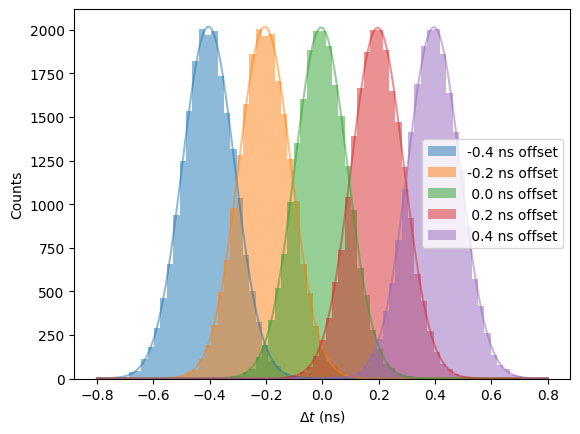

In [35]:
TOF_V00 = timestamps_DLED_dec0_DATA_00 - timestamps_DLED_dec1_DATA_00
TOF_V02 = timestamps_DLED_dec0_DATA_02 - timestamps_DLED_dec1_DATA_02
TOF_V20 = timestamps_DLED_dec0_DATA_20 - timestamps_DLED_dec1_DATA_20
TOF_V04 = timestamps_DLED_dec0_DATA_04 - timestamps_DLED_dec1_DATA_04
TOF_V40 = timestamps_DLED_dec0_DATA_40 - timestamps_DLED_dec1_DATA_40

#------------------------------------------- Histogram and gaussian fit -----------------------------------------------
centroid_V00, sigmaN_V00 = calculate_gaussian_center_sigma(TOF_V00[None,:], np.zeros((TOF_V00.shape[0])), nbins = nbins) 

plot_gaussian(TOF_V04, centroid_V00, range = 0.8, label = '-0.4 ns offset', nbins = nbins)
plot_gaussian(TOF_V02, centroid_V00, range = 0.8, label = '-0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_V00, centroid_V00, range = 0.8, label = ' 0.0 ns offset', nbins = nbins)
plot_gaussian(TOF_V20, centroid_V00, range = 0.8, label = ' 0.2 ns offset', nbins = nbins)
plot_gaussian(TOF_V40, centroid_V00, range = 0.8, label = ' 0.4 ns offset', nbins = nbins)


params_V04, errors_V04 = get_gaussian_params(TOF_V04, centroid_V00, range = 0.8, nbins = nbins)
params_V02, errors_V02 = get_gaussian_params(TOF_V02, centroid_V00, range = 0.8, nbins = nbins)
params_V00, errors_V00 = get_gaussian_params(TOF_V00, centroid_V00, range = 0.8, nbins = nbins)
params_V20, errors_V20 = get_gaussian_params(TOF_V20, centroid_V00, range = 0.8, nbins = nbins)
params_V40, errors_V40 = get_gaussian_params(TOF_V40, centroid_V00, range = 0.8, nbins = nbins)


print("V40: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V40[2], errors_V40[2], params_V40[3], errors_V40[3]))
print("V20: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V20[2], errors_V20[2], params_V20[3], errors_V20[3]))
print("V00: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V00[2], errors_V00[2], params_V00[3], errors_V00[3]))
print("V02: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V02[2], errors_V02[2], params_V02[3], errors_V02[3]))
print("V04: CENTROID(ns) = %.4f +/- %.5f  FWHM(ns) = %.4f +/- %.5f" % (params_V04[2], errors_V04[2], params_V04[3], errors_V04[3]))

print('')
plt.legend()
plt.xlabel('$\Delta t$ (ns)')
plt.ylabel('Counts')
plt.show()

In [36]:
error_V02 = abs((TOF_V02 - centroid_V00[:, np.newaxis] + time_step*t_shift))
error_V00 = abs((TOF_V00 - centroid_V00[:, np.newaxis]))
error_V20 = abs((TOF_V20 - centroid_V00[:, np.newaxis] - time_step*t_shift))
error_V04 = abs((TOF_V04 - centroid_V00[:, np.newaxis] + 2*time_step*t_shift))
error_V40 = abs((TOF_V40 - centroid_V00[:, np.newaxis] - 2*time_step*t_shift))

Error = np.concatenate((error_V02, error_V00, error_V20, error_V04, error_V40), axis = 1)   
MAE = np.mean(Error)   
print(MAE)  

0.08593730213504311


# **ML**

In [37]:
dir = '/home/josea/DEEP_TIMING/DEEP_TIMING_VS/predictions/'
test_dec0 = np.load(os.path.join(dir,'test_dec0_Na22.npz'), allow_pickle = True)['data']
test_dec1 = np.load(os.path.join(dir,'test_dec1_Na22.npz'), allow_pickle = True)['data']

In [38]:
test_dec0_V02 = test_dec0[:,:normalized_data.shape[0]] 
test_dec0_V00 = test_dec0[:,normalized_data.shape[0] : 2*normalized_data.shape[0]] 
test_dec0_V20 = test_dec0[:,2*normalized_data.shape[0] :3*normalized_data.shape[0]] 
test_dec0_V04 = test_dec0[:,3*normalized_data.shape[0] :4*normalized_data.shape[0]] 
test_dec0_V40 = test_dec0[:,4*normalized_data.shape[0]:] 

test_dec1_V02 = test_dec1[:,:normalized_data.shape[0]] 
test_dec1_V00 = test_dec1[:,normalized_data.shape[0] : 2*normalized_data.shape[0]] 
test_dec1_V20 = test_dec1[:,2*normalized_data.shape[0] :3*normalized_data.shape[0]] 
test_dec1_V04 = test_dec1[:,3*normalized_data.shape[0] :4*normalized_data.shape[0]] 
test_dec1_V40 = test_dec1[:,4*normalized_data.shape[0]:]

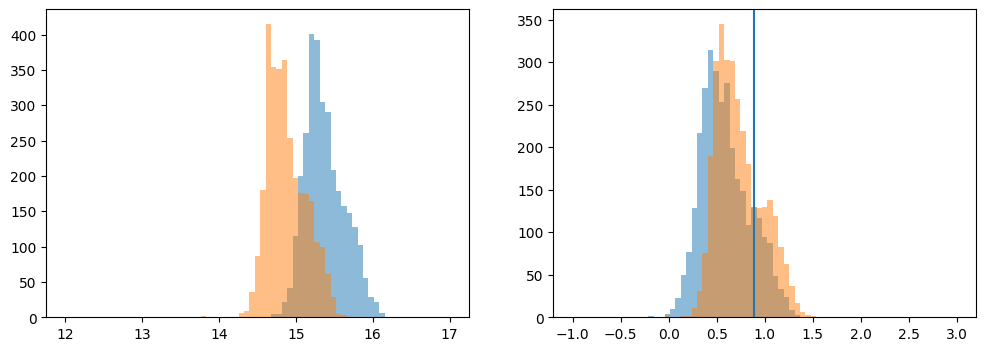

In [39]:
plt.figure(figsize = (12,4))

plt.subplot(121)  
plt.hist(timestamps_CFD_dec0_DATA_00, range=[12, 17], bins = nbins, alpha = 0.5);
plt.hist(timestamps_CFD_dec1_DATA_00, range=[12, 17], bins = nbins, alpha = 0.5);

plt.subplot(122) 
plt.hist(test_dec0_V00[-1,:], range=[-1, 3], bins = nbins, alpha = 0.5)
plt.hist(test_dec1_V00[-1,:], range=[-1, 3], bins = nbins, alpha = 0.5)
plt.axvline(x=0.89)